Conducting an Exploratory Data Analysis (EDA) on a home loan approval dataset . The primary goals include gaining familiarity with the dataset, performing data exploration and visualization, identifying patterns, trends, and potential insights, and generating meaningful visualizations to communicate findings effectively.multiple categories.iple categories.

In [1]:
# Importing all the major Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Data Exploration

## Loading the dataset into a Python environment

In [2]:
df = pd.read_csv("Loan_Approval.csv")

In [3]:
# Viewing the dataset
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban
363,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban
364,LP002980,Male,No,0,Graduate,No,3250,1993,126.0,360.0,NaN,Semiurban
365,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural


## Display the first few rows of the dataset to understand its structure.

In [4]:
df.head(15)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
5,LP001054,Male,Yes,0,Not Graduate,Yes,2165,3422,152.0,360.0,1.0,Urban
6,LP001055,Female,No,1,Not Graduate,No,2226,0,59.0,360.0,1.0,Semiurban
7,LP001056,Male,Yes,2,Not Graduate,No,3881,0,147.0,360.0,0.0,Rural
8,LP001059,Male,Yes,2,Graduate,NaN,13633,0,280.0,240.0,1.0,Urban
9,LP001067,Male,No,0,Not Graduate,No,2400,2400,123.0,360.0,1.0,Semiurban


In [5]:
# Checking for the basic information of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


- We have a total of 367 columns in the dataset.
- We possess a dataset
    - featuring 5 numerical column i.e, ApplicantIncome, CoapplicantIncome, LoanAmount, Loan_Amount_Term and Credit_History
    - 6 object-type columns containing textual or categorical data i.e, Loan_ID, Gender, Married, Dependents, Education, Self_Employed and Property_Area..

In [6]:
# We are converting string to numeric using to_numeric method.
df['Dependents'] = pd.to_numeric(df['Dependents'],errors='coerce')

## Check for missing values and handle them if necessary.

In [7]:
df.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           50
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

__The Dataset Contains following null values.__
- __Gender Column__ : 11 Null Values
- __Dependents Column__ : 50 Null Values
- __Self_Employed Column__ : 23 Null Values
- __LoanAmount Column__ : 5 Null Values
- __Loan_Amount_Term Column__ : 6 Null Values
- __Credit_History Column__ : 29 Null Values

In [8]:
# Checking for the NULL values present in the df.Dependents
df[df.Dependents.isnull()]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
12,LP001083,Male,No,NaN,Graduate,No,4166,0,40.0,180.0,NaN,Urban
17,LP001107,Male,Yes,NaN,Graduate,No,3786,333,126.0,360.0,1.0,Semiurban
21,LP001124,Female,No,NaN,Not Graduate,No,2083,0,28.0,180.0,1.0,Urban
46,LP001237,Male,Yes,NaN,Not Graduate,No,4163,1475,162.0,360.0,1.0,Urban
49,LP001270,Male,Yes,NaN,Not Graduate,Yes,8000,250,187.0,360.0,1.0,Semiurban
51,LP001287,NaN,Yes,NaN,Not Graduate,No,3500,833,120.0,360.0,1.0,Semiurban
59,LP001324,Male,Yes,NaN,Graduate,No,4720,0,90.0,180.0,1.0,Semiurban
64,LP001348,Male,Yes,NaN,Not Graduate,No,4490,0,125.0,360.0,1.0,Urban
70,LP001366,Female,No,NaN,Graduate,No,3250,0,95.0,360.0,1.0,Semiurban
80,LP001420,Male,Yes,NaN,Graduate,No,3829,1103,163.0,360.0,0.0,Urban


In [9]:
# Using Fillna Method to deal with null values present in df.Dependents Column
df.Dependents = df.Dependents.fillna(df.Dependents.median())

In [10]:
# Checking for the NULL values present in the df.Gender
df[df.Gender.isnull()]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
22,LP001128,NaN,No,0.0,Graduate,No,3909,0,101.0,360.0,1.0,Urban
51,LP001287,NaN,Yes,0.0,Not Graduate,No,3500,833,120.0,360.0,1.0,Semiurban
106,LP001563,NaN,No,0.0,Graduate,No,1596,1760,119.0,360.0,0.0,Urban
138,LP001769,NaN,No,0.0,Graduate,No,3333,1250,110.0,360.0,1.0,Semiurban
209,LP002165,NaN,No,1.0,Not Graduate,No,2038,4027,100.0,360.0,1.0,Rural
231,LP002298,NaN,No,0.0,Graduate,Yes,2860,2988,138.0,360.0,1.0,Urban
245,LP002355,NaN,Yes,0.0,Graduate,No,3186,3145,150.0,180.0,0.0,Semiurban
279,LP002553,NaN,No,0.0,Graduate,No,29167,0,185.0,360.0,1.0,Semiurban
296,LP002614,NaN,No,0.0,Graduate,No,6478,0,108.0,360.0,1.0,Semiurban
303,LP002657,NaN,Yes,1.0,Not Graduate,Yes,570,2125,68.0,360.0,1.0,Rural


In [11]:
# Using Fillna Method to deal with null values present in df.Gender Column
df.Gender = df.Gender.fillna('Unknown')

In [12]:
# Checking for the NULL values present in the df.Self_Employed
df[df.Self_Employed.isnull()]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
8,LP001059,Male,Yes,2.0,Graduate,NaN,13633,0,280.0,240.0,1.0,Urban
11,LP001082,Male,Yes,1.0,Graduate,NaN,2185,1516,162.0,360.0,1.0,Semiurban
13,LP001094,Male,Yes,2.0,Graduate,NaN,12173,0,166.0,360.0,0.0,Semiurban
36,LP001208,Male,Yes,2.0,Graduate,NaN,7350,4029,185.0,180.0,1.0,Urban
72,LP001375,Male,Yes,1.0,Graduate,NaN,4083,1775,139.0,60.0,1.0,Urban
89,LP001472,Female,No,0.0,Graduate,NaN,5058,0,200.0,360.0,1.0,Rural
142,LP001789,Male,Yes,0.0,Not Graduate,NaN,6794,528,139.0,360.0,0.0,Urban
161,LP001906,Male,No,0.0,Graduate,NaN,2964,0,84.0,360.0,0.0,Semiurban
168,LP001950,Female,Yes,0.0,Graduate,NaN,1750,2935,94.0,360.0,0.0,Semiurban
175,LP001999,Male,Yes,2.0,Graduate,NaN,4912,4614,160.0,360.0,1.0,Rural


In [13]:
# Using Fillna Method to deal with null values present in df.Self_Employed Column
df.Self_Employed = df.Self_Employed.fillna('Unknown')

In [14]:
# Checking for the NULL values present in the df.LoanAmount
df[df.LoanAmount.isnull()]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
78,LP001415,Male,Yes,1.0,Graduate,No,3413,4053,NaN,360.0,1.0,Semiurban
101,LP001542,Female,Yes,0.0,Graduate,No,2262,0,NaN,480.0,0.0,Semiurban
188,LP002057,Male,Yes,0.0,Not Graduate,No,13083,0,NaN,360.0,1.0,Rural
247,LP002360,Male,Yes,0.0,Graduate,No,10000,0,NaN,360.0,1.0,Urban
289,LP002593,Male,Yes,1.0,Graduate,No,8333,4000,NaN,360.0,1.0,Urban


In [15]:
# Checking for the NULL values present in the df.LoanAmount
df.LoanAmount = df.LoanAmount.fillna(df.LoanAmount.median())

In [16]:
# Checking for the NULL values present in the df.Loan_Amount_Term
df[df.Loan_Amount_Term.isnull()]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
45,LP001232,Male,Yes,0.0,Graduate,No,4260,3900,185.0,NaN,NaN,Urban
48,LP001268,Male,No,0.0,Graduate,No,6792,3338,187.0,NaN,1.0,Urban
117,LP001611,Male,Yes,1.0,Graduate,No,1516,2900,80.0,NaN,0.0,Rural
129,LP001695,Male,Yes,1.0,Not Graduate,No,3321,2088,70.0,NaN,1.0,Semiurban
184,LP002045,Male,Yes,0.0,Graduate,No,10166,750,150.0,NaN,1.0,Urban
214,LP002183,Male,Yes,0.0,Not Graduate,No,3754,3719,118.0,NaN,1.0,Rural


In [17]:
# Checking for the NULL values present in the df.Loan_Amount_Term
df.Loan_Amount_Term = df.Loan_Amount_Term.fillna(df.Loan_Amount_Term.median())

In [18]:
# Checking for the NULL values present in the df.Credit_History
df[df.Credit_History.isnull()]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
3,LP001035,Male,Yes,2.0,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
12,LP001083,Male,No,0.0,Graduate,No,4166,0,40.0,180.0,NaN,Urban
26,LP001163,Male,Yes,2.0,Graduate,No,4363,1250,140.0,360.0,NaN,Urban
28,LP001174,Male,Yes,0.0,Graduate,No,3772,833,57.0,360.0,NaN,Semiurban
45,LP001232,Male,Yes,0.0,Graduate,No,4260,3900,185.0,360.0,NaN,Urban
90,LP001475,Male,Yes,0.0,Graduate,Yes,3188,2286,130.0,360.0,NaN,Rural
99,LP001527,Male,Yes,0.0,Graduate,No,6835,0,188.0,360.0,NaN,Semiurban
104,LP001558,Male,No,0.0,Graduate,No,2243,2233,107.0,360.0,NaN,Semiurban
115,LP001601,Male,No,0.0,Graduate,No,4243,4123,157.0,360.0,NaN,Semiurban
139,LP001771,Female,No,0.0,Graduate,No,4083,0,103.0,360.0,NaN,Semiurban


In [19]:
# Checking for the NULL values present in the df.Credit_History
df.Credit_History = df.Credit_History.fillna(df.Credit_History.median())

In [20]:
# Checking whether all the null values present in the data have been dealt with or not.
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [21]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0.0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1.0,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2.0,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2.0,Graduate,No,2340,2546,100.0,360.0,1.0,Urban
4,LP001051,Male,No,0.0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,Male,Yes,0.0,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban
363,LP002975,Male,Yes,0.0,Graduate,No,4158,709,115.0,360.0,1.0,Urban
364,LP002980,Male,No,0.0,Graduate,No,3250,1993,126.0,360.0,1.0,Semiurban
365,LP002986,Male,Yes,0.0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural


## Summarize basic statistics (mean, median, standard deviation, etc.) for the numeric columns.

In [22]:
df.describe()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000
mean,0.479564,4805.599455,1569.577657,135.980926,342.822888,0.839237
std,0.756749,4910.685399,2334.232099,60.959739,64.658402,0.367814
min,0.000000,0.000000,0.000000,28.000000,6.000000,0.000000
25%,0.000000,2864.000000,0.000000,101.000000,360.000000,1.000000
50%,0.000000,3786.000000,1025.000000,125.000000,360.000000,1.000000
75%,1.000000,5060.000000,2430.500000,157.500000,360.000000,1.000000
max,2.000000,72529.000000,24000.000000,550.000000,480.000000,1.000000


In [23]:
df.var(numeric_only=True).round(2)

Dependents                  0.57
ApplicantIncome      24114831.09
CoapplicantIncome     5448639.49
LoanAmount               3716.09
Loan_Amount_Term         4180.71
Credit_History              0.14
dtype: float64

- __Dependents__
    - Mean is 0.479564
    - Standard deviation of 0.756749
    - Minimum is 0.00
    - Maximum is 2.00.- __ApplicantIncome__
    - Mean  is 4238.96457
    - Standard deviation of 1950.97635
    - Minimum is 0.0
    - Maximum is 8354.000000
- __CoapplicantIncome__
    - Mean is 1425.5013S
    - Standard deviation of 1600.08625
    - Minimum is 0.
    - Maximum is 6076.250000.
The mean LoanAmout is 135.980926 ,with standard deviation of 60.959739.The minimum LoanAmount is 28.000000 & maximum is 550.000000.
The mean Loan_Amount_Term is 342.822888 ,with standard deviation of 64.658402.The minimum Dependent is 6.000000 & maximum is 480.000000.
The mean Credit_History is 0.839237 ,with standard deviation of 0.367814.The minimum Credit_History is 0.00 & maximum is 1.00.

<Axes: xlabel='ApplicantIncome'>

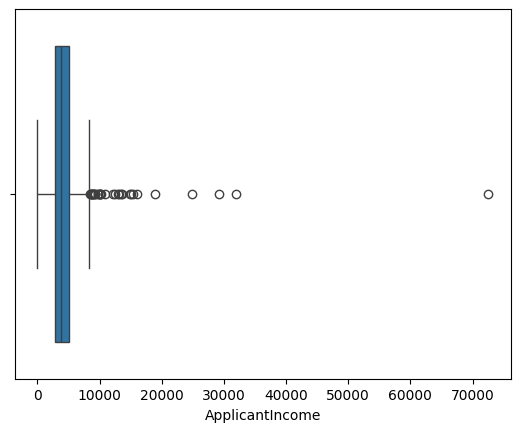

In [24]:
# Checking for Outlier and removing the outliers of the df.ApplicantIncome Column.
sns.boxplot(df.ApplicantIncome,orient='h')

In [25]:
Q1,Q3 = df.ApplicantIncome.quantile([0.25,0.75])

In [26]:
Q1,Q3

(2864.0, 5060.0)

In [27]:
IQR = Q3 - Q1

In [28]:
IQR

2196.0

In [29]:
UL = Q3 + 1.5*(IQR)
LL = Q1 - 1.5*(IQR)

In [30]:
UL,LL

(8354.0, -430.0)

In [31]:
df[df.ApplicantIncome>UL]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
8,LP001059,Male,Yes,2.0,Graduate,Unknown,13633,0,280.0,240.0,1.0,Urban
13,LP001094,Male,Yes,2.0,Graduate,Unknown,12173,0,166.0,360.0,0.0,Semiurban
18,LP001108,Male,Yes,0.0,Graduate,No,9226,7916,300.0,360.0,1.0,Urban
81,LP001428,Male,Yes,0.0,Graduate,No,72529,0,360.0,360.0,1.0,Urban
83,LP001446,Male,Yes,0.0,Graduate,No,8449,0,257.0,360.0,1.0,Rural
91,LP001483,Male,Yes,0.0,Graduate,No,13518,0,390.0,360.0,1.0,Rural
98,LP001517,Male,Yes,0.0,Graduate,No,9719,0,61.0,360.0,1.0,Urban
124,LP001655,Female,No,0.0,Graduate,No,12500,0,300.0,360.0,0.0,Urban
143,LP001791,Male,Yes,0.0,Graduate,Yes,32000,0,550.0,360.0,1.0,Semiurban
144,LP001794,Male,Yes,2.0,Graduate,Yes,10890,0,260.0,12.0,1.0,Rural


In [32]:
df.ApplicantIncome = np.where(df.ApplicantIncome>UL,UL,df.ApplicantIncome)

In [33]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0.0,Graduate,No,5720.0,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1.0,Graduate,No,3076.0,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2.0,Graduate,No,5000.0,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2.0,Graduate,No,2340.0,2546,100.0,360.0,1.0,Urban
4,LP001051,Male,No,0.0,Not Graduate,No,3276.0,0,78.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,Male,Yes,0.0,Not Graduate,Yes,4009.0,1777,113.0,360.0,1.0,Urban
363,LP002975,Male,Yes,0.0,Graduate,No,4158.0,709,115.0,360.0,1.0,Urban
364,LP002980,Male,No,0.0,Graduate,No,3250.0,1993,126.0,360.0,1.0,Semiurban
365,LP002986,Male,Yes,0.0,Graduate,No,5000.0,2393,158.0,360.0,1.0,Rural


<Axes: xlabel='CoapplicantIncome'>

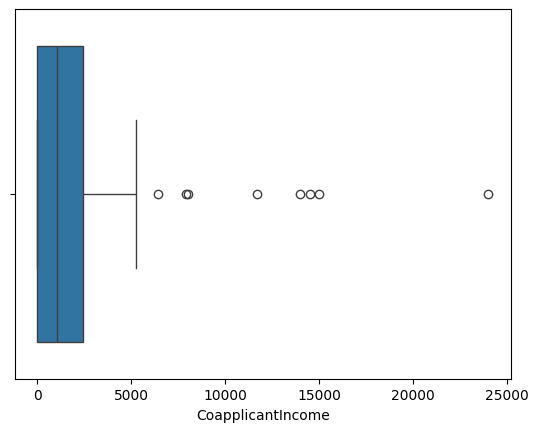

In [34]:
# Checking for Outlier and removing the outliers of the df.CoapplicantIncome Column.
sns.boxplot(df.CoapplicantIncome,orient='h')

In [35]:
q1,q3 = df.CoapplicantIncome.quantile([0.25,0.75])

In [36]:
q1,q3

(0.0, 2430.5)

In [37]:
iqr = q3 - q1

In [38]:
iqr

2430.5

In [39]:
ul = q3 + 1.5*(iqr)
ll = q1 - 1.5*(iqr)

In [40]:
ul,ll

(6076.25, -3645.75)

In [41]:
df[df.CoapplicantIncome>ul]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
18,LP001108,Male,Yes,0.0,Graduate,No,8354.0,7916,300.0,360.0,1.0,Urban
25,LP001153,Male,No,0.0,Graduate,No,0.0,24000,148.0,360.0,0.0,Rural
85,LP001452,Male,Yes,2.0,Graduate,No,4635.0,8000,102.0,180.0,1.0,Rural
123,LP001652,Male,No,0.0,Graduate,No,2500.0,6414,187.0,360.0,0.0,Rural
230,LP002294,Male,No,0.0,Graduate,No,8354.0,14507,130.0,360.0,1.0,Semiurban
237,LP002325,Male,Yes,2.0,Not Graduate,No,6166.0,13983,102.0,360.0,1.0,Rural
284,LP002570,Female,Yes,2.0,Graduate,No,8354.0,11666,460.0,360.0,1.0,Urban
351,LP002901,Male,No,0.0,Graduate,No,2283.0,15000,106.0,360.0,1.0,Rural


In [42]:
df.CoapplicantIncome = np.where(df.CoapplicantIncome>ul,ul,df.CoapplicantIncome)

In [43]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0.0,Graduate,No,5720.0,0.0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1.0,Graduate,No,3076.0,1500.0,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2.0,Graduate,No,5000.0,1800.0,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2.0,Graduate,No,2340.0,2546.0,100.0,360.0,1.0,Urban
4,LP001051,Male,No,0.0,Not Graduate,No,3276.0,0.0,78.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,Male,Yes,0.0,Not Graduate,Yes,4009.0,1777.0,113.0,360.0,1.0,Urban
363,LP002975,Male,Yes,0.0,Graduate,No,4158.0,709.0,115.0,360.0,1.0,Urban
364,LP002980,Male,No,0.0,Graduate,No,3250.0,1993.0,126.0,360.0,1.0,Semiurban
365,LP002986,Male,Yes,0.0,Graduate,No,5000.0,2393.0,158.0,360.0,1.0,Rural


<Axes: ylabel='LoanAmount'>

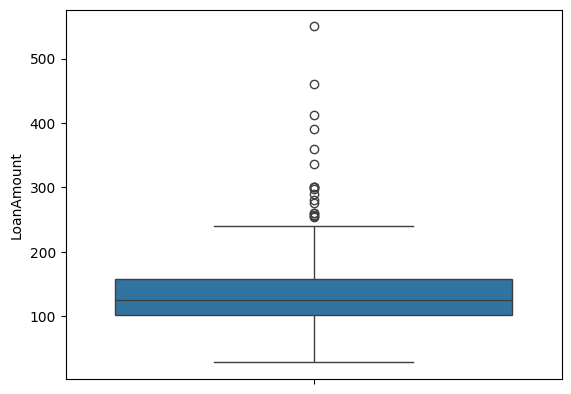

In [44]:
sns.boxplot(df.LoanAmount)

In [45]:
q1_loanAmount,q3_loanAmount = df.LoanAmount.quantile([0.25,0.75])

In [46]:
q1_loanAmount,q3_loanAmount

(101.0, 157.5)

In [47]:
iqr_loanAmount = q3_loanAmount - q1_loanAmount

In [48]:
iqr_loanAmount

56.5

In [49]:
ul_loanAmount = q3_loanAmount + 1.5*(iqr_loanAmount)
ll_loanAmount = q1_loanAmount - 1.5*(iqr_loanAmount)

In [50]:
ul_loanAmount,ll_loanAmount

(242.25, 16.25)

In [51]:
df[df.LoanAmount>ul_loanAmount]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
8,LP001059,Male,Yes,2.0,Graduate,Unknown,8354.0,0.00,280.0,240.0,1.0,Urban
18,LP001108,Male,Yes,0.0,Graduate,No,8354.0,6076.25,300.0,360.0,1.0,Urban
24,LP001149,Male,Yes,0.0,Graduate,No,5400.0,4380.00,290.0,360.0,1.0,Urban
27,LP001169,Male,Yes,0.0,Graduate,No,7500.0,3750.00,275.0,360.0,1.0,Urban
81,LP001428,Male,Yes,0.0,Graduate,No,8354.0,0.00,360.0,360.0,1.0,Urban
83,LP001446,Male,Yes,0.0,Graduate,No,8354.0,0.00,257.0,360.0,1.0,Rural
91,LP001483,Male,Yes,0.0,Graduate,No,8354.0,0.00,390.0,360.0,1.0,Rural
96,LP001500,Male,Yes,1.0,Graduate,No,3333.0,4200.00,256.0,360.0,1.0,Urban
124,LP001655,Female,No,0.0,Graduate,No,8354.0,0.00,300.0,360.0,0.0,Urban
143,LP001791,Male,Yes,0.0,Graduate,Yes,8354.0,0.00,550.0,360.0,1.0,Semiurban


In [52]:
df.LoanAmount = np.where(df.LoanAmount>ul_loanAmount,ul_loanAmount,df.LoanAmount)

In [53]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0.0,Graduate,No,5720.0,0.0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1.0,Graduate,No,3076.0,1500.0,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2.0,Graduate,No,5000.0,1800.0,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2.0,Graduate,No,2340.0,2546.0,100.0,360.0,1.0,Urban
4,LP001051,Male,No,0.0,Not Graduate,No,3276.0,0.0,78.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,Male,Yes,0.0,Not Graduate,Yes,4009.0,1777.0,113.0,360.0,1.0,Urban
363,LP002975,Male,Yes,0.0,Graduate,No,4158.0,709.0,115.0,360.0,1.0,Urban
364,LP002980,Male,No,0.0,Graduate,No,3250.0,1993.0,126.0,360.0,1.0,Semiurban
365,LP002986,Male,Yes,0.0,Graduate,No,5000.0,2393.0,158.0,360.0,1.0,Rural


# Data Visualization

## Univariate Analysis

### HISTOGRAMS

In [54]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0.0,Graduate,No,5720.0,0.0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1.0,Graduate,No,3076.0,1500.0,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2.0,Graduate,No,5000.0,1800.0,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2.0,Graduate,No,2340.0,2546.0,100.0,360.0,1.0,Urban
4,LP001051,Male,No,0.0,Not Graduate,No,3276.0,0.0,78.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,Male,Yes,0.0,Not Graduate,Yes,4009.0,1777.0,113.0,360.0,1.0,Urban
363,LP002975,Male,Yes,0.0,Graduate,No,4158.0,709.0,115.0,360.0,1.0,Urban
364,LP002980,Male,No,0.0,Graduate,No,3250.0,1993.0,126.0,360.0,1.0,Semiurban
365,LP002986,Male,Yes,0.0,Graduate,No,5000.0,2393.0,158.0,360.0,1.0,Rural


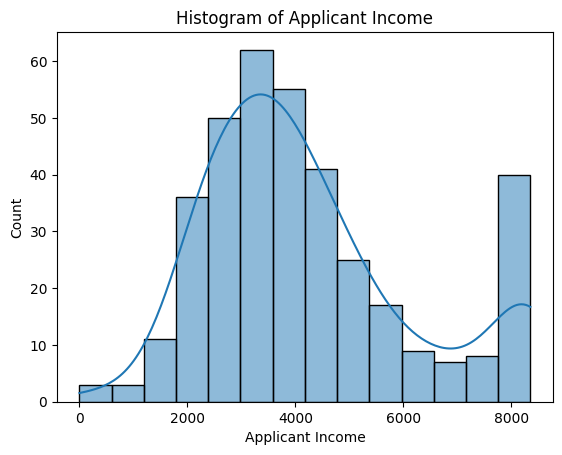

In [55]:
sns.histplot(df.ApplicantIncome,kde=True)
plt.xlabel('Applicant Income')
plt.title('Histogram of Applicant Income')
plt.show()

- Distribution of Applicant Income:
The histogram provides a visual representation of the distribution of applicant incomes in the dataset.
It shows the frequency or count of applicants falling within different income ranges.
- Central Tendency:
The shape of the histogram can indicate the central tendency of applicant incomes. For example, a peak around a specific income range may suggest a common income level among applicants.
- Variability:
The spread of the histogram can give insights into the variability of applicant incomes. A wider spread indicates a broader range of income levels among applicants.
- Skewness:
The symmetry or skewness of the histogram can reveal whether the distribution of applicant incomes is skewed to the left (negatively skewed), to the right (positively skewed), or symmetric.

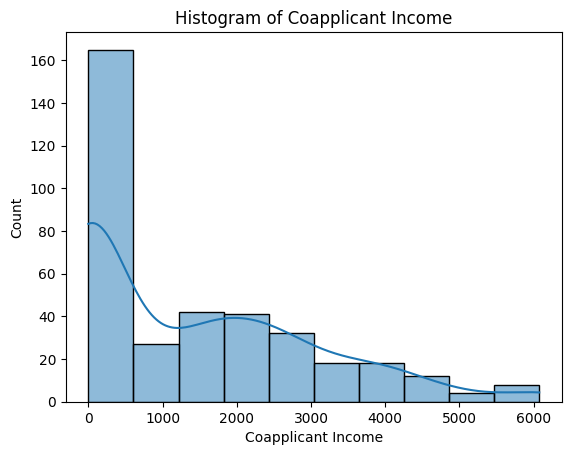

In [56]:
sns.histplot(df.CoapplicantIncome,kde=True)
plt.xlabel('Coapplicant Income')
plt.title('Histogram of Coapplicant Income')
plt.show()

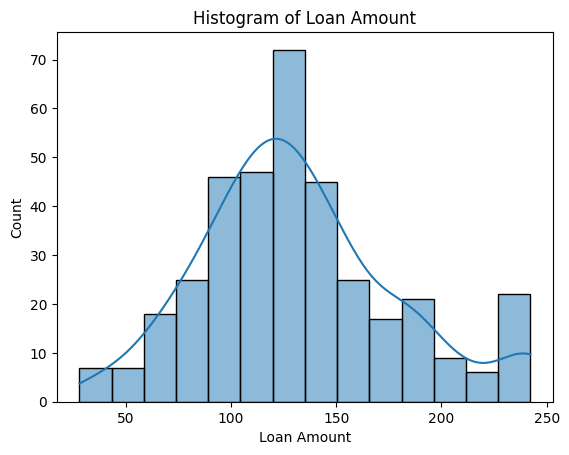

In [57]:
sns.histplot(df.LoanAmount,kde=True)
plt.xlabel('Loan Amount')
plt.title('Histogram of Loan Amount')
plt.show()

### BAR CHARTS

In [58]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0.0,Graduate,No,5720.0,0.0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1.0,Graduate,No,3076.0,1500.0,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2.0,Graduate,No,5000.0,1800.0,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2.0,Graduate,No,2340.0,2546.0,100.0,360.0,1.0,Urban
4,LP001051,Male,No,0.0,Not Graduate,No,3276.0,0.0,78.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,Male,Yes,0.0,Not Graduate,Yes,4009.0,1777.0,113.0,360.0,1.0,Urban
363,LP002975,Male,Yes,0.0,Graduate,No,4158.0,709.0,115.0,360.0,1.0,Urban
364,LP002980,Male,No,0.0,Graduate,No,3250.0,1993.0,126.0,360.0,1.0,Semiurban
365,LP002986,Male,Yes,0.0,Graduate,No,5000.0,2393.0,158.0,360.0,1.0,Rural


<Axes: xlabel='Gender', ylabel='count'>

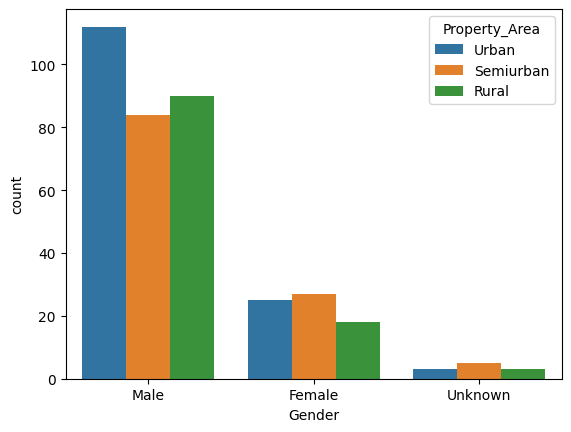

In [59]:
sns.countplot(x=df.Gender,hue=df.Property_Area)

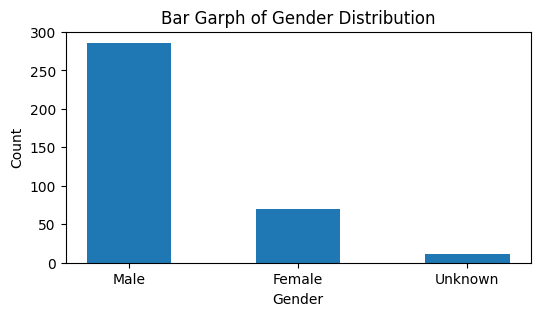

In [60]:
plt.figure(figsize=(6,3))
plt.bar(x=df.Gender.value_counts().index,height=df.Gender.value_counts(),width=0.5)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Bar Garph of Gender Distribution')
plt.show()

In [61]:
df.Dependents.value_counts()

Dependents
0.0    250
2.0     59
1.0     58
Name: count, dtype: int64

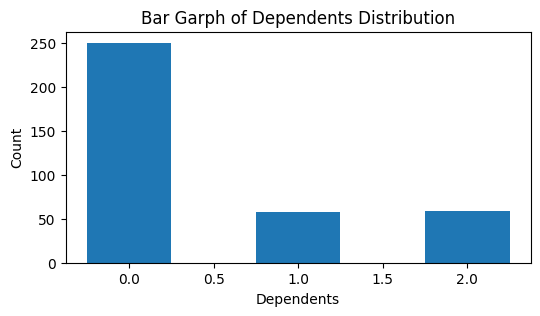

In [62]:
plt.figure(figsize=(6,3))
plt.bar(x=df.Dependents.value_counts().index,height=df.Dependents.value_counts(),width=0.5)
plt.xlabel('Dependents')
plt.ylabel('Count')
plt.title('Bar Garph of Dependents Distribution')
plt.show()

The resulting bar graph provides a clear visualization of the distribution of dependents, allowing users to quickly identify the most common number of dependents (0.0, with a count of 250) and the least common numbers (2.0 and 1.0, with counts of 59 and 58, respectively).


In [63]:
df.Education.value_counts()

Education
Graduate        283
Not Graduate     84
Name: count, dtype: int64

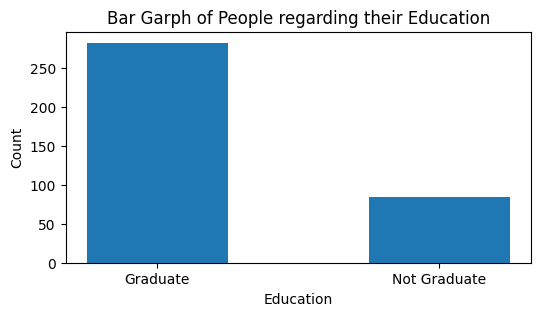

In [64]:
plt.figure(figsize=(6,3))
plt.bar(x=df.Education.value_counts().index,height=df.Education.value_counts(),width=0.5)
plt.xlabel('Education')
plt.ylabel('Count')
plt.title('Bar Garph of People regarding their Education')
plt.show()

In [65]:
df.Property_Area.value_counts()

Property_Area
Urban        140
Semiurban    116
Rural        111
Name: count, dtype: int64

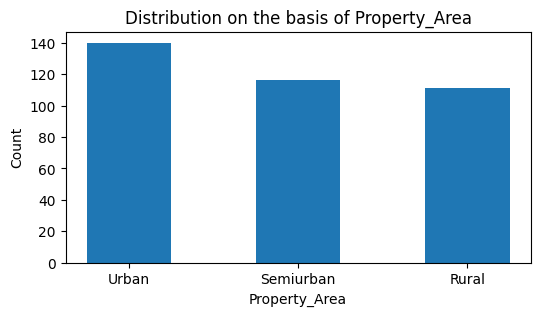

In [66]:
plt.figure(figsize=(6,3))
plt.bar(x=df.Property_Area.value_counts().index,height=df.Property_Area.value_counts(),width=0.5)
plt.xlabel('Property_Area')
plt.ylabel('Count')
plt.title('Distribution on the basis of Property_Area')
plt.show()

In [67]:
df.Self_Employed.value_counts()

Self_Employed
No         307
Yes         37
Unknown     23
Name: count, dtype: int64

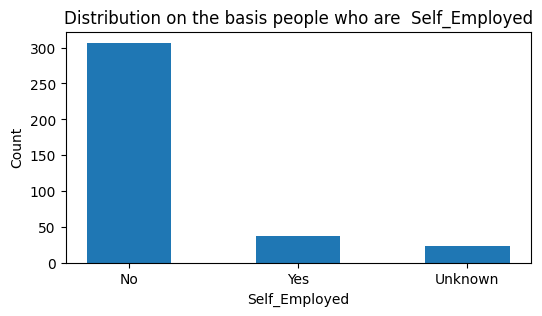

In [68]:
plt.figure(figsize=(6,3))
plt.bar(x=df.Self_Employed.value_counts().index,height=df.Self_Employed.value_counts(),width=0.5)
plt.xlabel('Self_Employed')
plt.ylabel('Count')
plt.title('Distribution on the basis people who are  Self_Employed')
plt.show()

### PIE CHARTS

In [69]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0.0,Graduate,No,5720.0,0.0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1.0,Graduate,No,3076.0,1500.0,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2.0,Graduate,No,5000.0,1800.0,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2.0,Graduate,No,2340.0,2546.0,100.0,360.0,1.0,Urban
4,LP001051,Male,No,0.0,Not Graduate,No,3276.0,0.0,78.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,Male,Yes,0.0,Not Graduate,Yes,4009.0,1777.0,113.0,360.0,1.0,Urban
363,LP002975,Male,Yes,0.0,Graduate,No,4158.0,709.0,115.0,360.0,1.0,Urban
364,LP002980,Male,No,0.0,Graduate,No,3250.0,1993.0,126.0,360.0,1.0,Semiurban
365,LP002986,Male,Yes,0.0,Graduate,No,5000.0,2393.0,158.0,360.0,1.0,Rural


In [70]:
df.Gender.value_counts()

Gender
Male       286
Female      70
Unknown     11
Name: count, dtype: int64

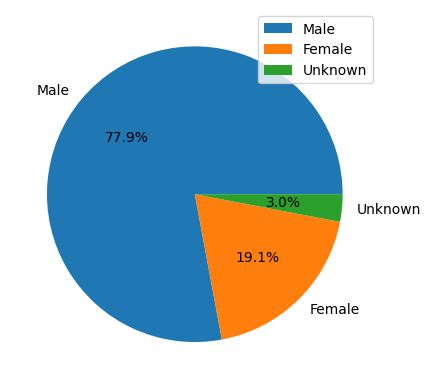

In [71]:
plt.pie(labels=df.Gender.value_counts().index,x=df.Gender.value_counts(),autopct='%1.1f%%')
plt.legend(labels=df.Gender.value_counts().index, loc="upper right")
plt.show()

## Gender Distribution Analysis

### Observations:
- The pie chart illustrates the distribution of genders within the dataset.
- Each slice represents a unique gender category, with sizes proportional to the frequency of each gender.

### Insights:
- **Gender Representation**: The chart visually displays the relative proportions of different genders.
- **Percentage Breakdown**: The percentages on each slice indicate the proportion of each gender category in the dataset.
- **Imbalance Detection**: Shows for any significant dominant gender categories.


In [72]:
df.Dependents.value_counts()

Dependents
0.0    250
2.0     59
1.0     58
Name: count, dtype: int64

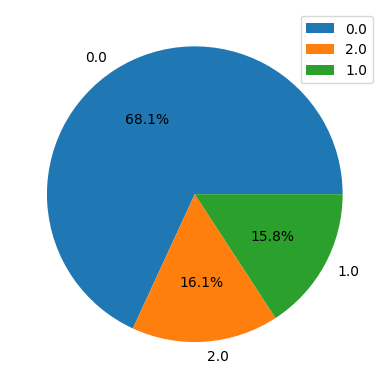

In [73]:
plt.pie(labels=df.Dependents.value_counts().index,x=df.Dependents.value_counts(),autopct='%1.1f%%')
plt.legend(labels=df.Dependents.value_counts().index, loc="upper right")
plt.show()

In [74]:
df.Property_Area.value_counts()

Property_Area
Urban        140
Semiurban    116
Rural        111
Name: count, dtype: int64

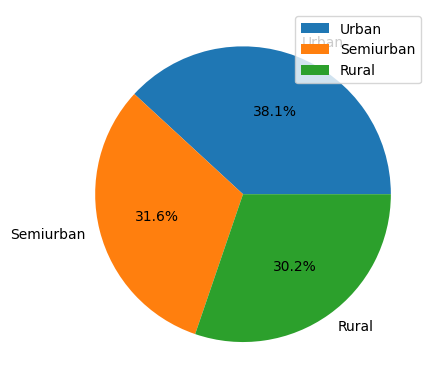

In [75]:
plt.pie(labels=df.Property_Area.value_counts().index,x=df.Property_Area.value_counts(),autopct='%1.1f%%')
plt.legend(labels=df.Property_Area.value_counts().index, loc="upper right")
plt.show()

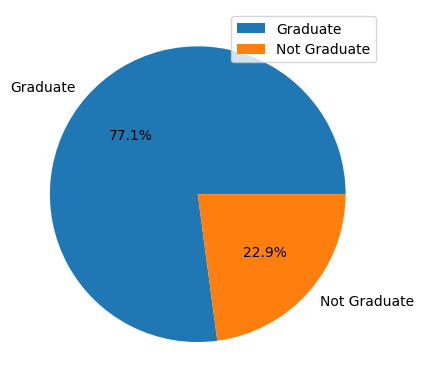

In [76]:
plt.pie(labels=df.Education.value_counts().index,x=df.Education.value_counts(),autopct='%1.1f%%')
plt.legend(labels=df.Education.value_counts().index, loc="upper right")
plt.show()

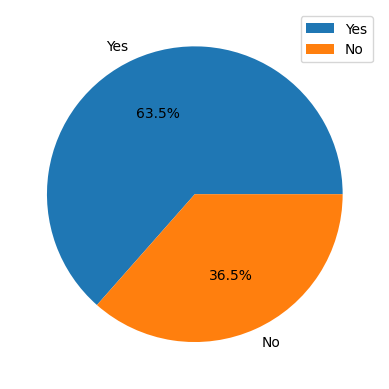

In [77]:
plt.pie(labels=df.Married.value_counts().index,x=df.Married.value_counts(),autopct='%1.1f%%')
plt.legend(labels=df.Married.value_counts().index, loc="upper right")
plt.show()

## Bivariate Analysis

In [78]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0.0,Graduate,No,5720.0,0.0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1.0,Graduate,No,3076.0,1500.0,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2.0,Graduate,No,5000.0,1800.0,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2.0,Graduate,No,2340.0,2546.0,100.0,360.0,1.0,Urban
4,LP001051,Male,No,0.0,Not Graduate,No,3276.0,0.0,78.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,Male,Yes,0.0,Not Graduate,Yes,4009.0,1777.0,113.0,360.0,1.0,Urban
363,LP002975,Male,Yes,0.0,Graduate,No,4158.0,709.0,115.0,360.0,1.0,Urban
364,LP002980,Male,No,0.0,Graduate,No,3250.0,1993.0,126.0,360.0,1.0,Semiurban
365,LP002986,Male,Yes,0.0,Graduate,No,5000.0,2393.0,158.0,360.0,1.0,Rural


### SCATTER PLOTS

In [79]:
df.groupby('ApplicantIncome')['CoapplicantIncome'].value_counts()

ApplicantIncome  CoapplicantIncome
0.0              1760.00              1
                 6076.25              1
570.0            2125.00              1
724.0            3510.00              1
1141.0           2017.00              1
                                     ..
8354.0           6076.25              3
                 750.00               1
                 2690.00              1
                 4255.00              1
                 5000.00              1
Name: count, Length: 329, dtype: int64

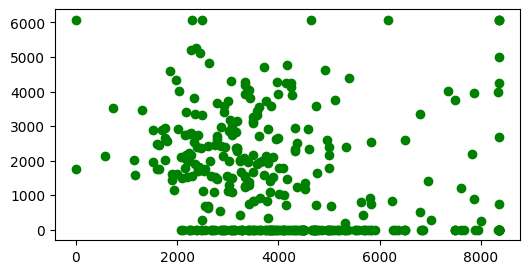

In [80]:
plt.figure(figsize=(6,3))
plt.scatter(df.ApplicantIncome,df.CoapplicantIncome,color='g')

In [81]:
df.groupby('ApplicantIncome')['LoanAmount'].value_counts()

ApplicantIncome  LoanAmount
0.0              148.0         1
                 180.0         1
570.0            68.0          1
724.0            213.0         1
1141.0           120.0         1
                              ..
8354.0           187.0         1
                 199.0         1
                 234.0         1
                 235.0         1
                 240.0         1
Name: count, Length: 352, dtype: int64

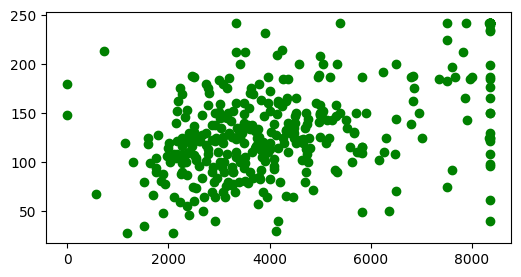

In [82]:
plt.figure(figsize=(6,3))
plt.scatter(df.ApplicantIncome,df.LoanAmount,color='g')

In [83]:
df.groupby('CoapplicantIncome')['LoanAmount'].value_counts()

CoapplicantIncome  LoanAmount
0.00               242.25        11
                   125.00         9
                   90.00          6
                   110.00         6
                   150.00         5
                                 ..
6076.25            242.25         2
                   106.00         1
                   130.00         1
                   148.00         1
                   187.00         1
Name: count, Length: 288, dtype: int64

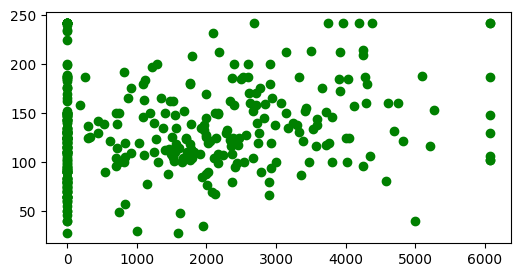

In [84]:
plt.figure(figsize=(6,3))
plt.scatter(df.CoapplicantIncome,df.LoanAmount,color='g')

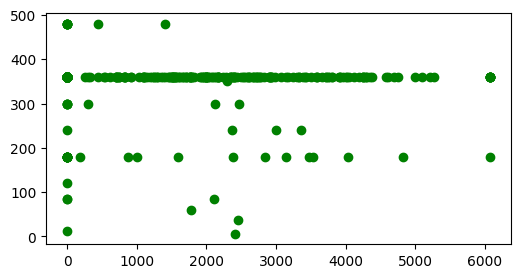

In [85]:
plt.figure(figsize=(6,3))
plt.scatter(df.CoapplicantIncome,df.Loan_Amount_Term,color='g')

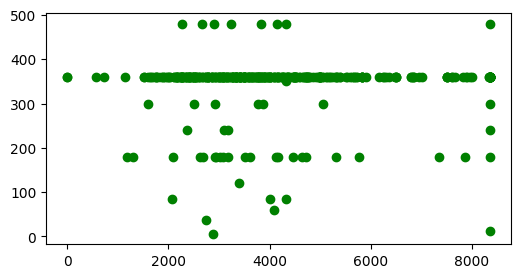

In [86]:
plt.figure(figsize=(6,3))
plt.scatter(df.ApplicantIncome,df.Loan_Amount_Term,color='g')

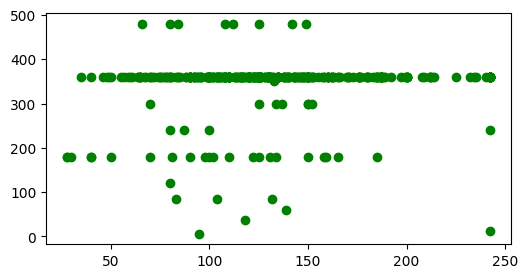

In [87]:
plt.figure(figsize=(6,3))
plt.scatter(df.LoanAmount,df.Loan_Amount_Term,color='g')

### PAIRPLOT

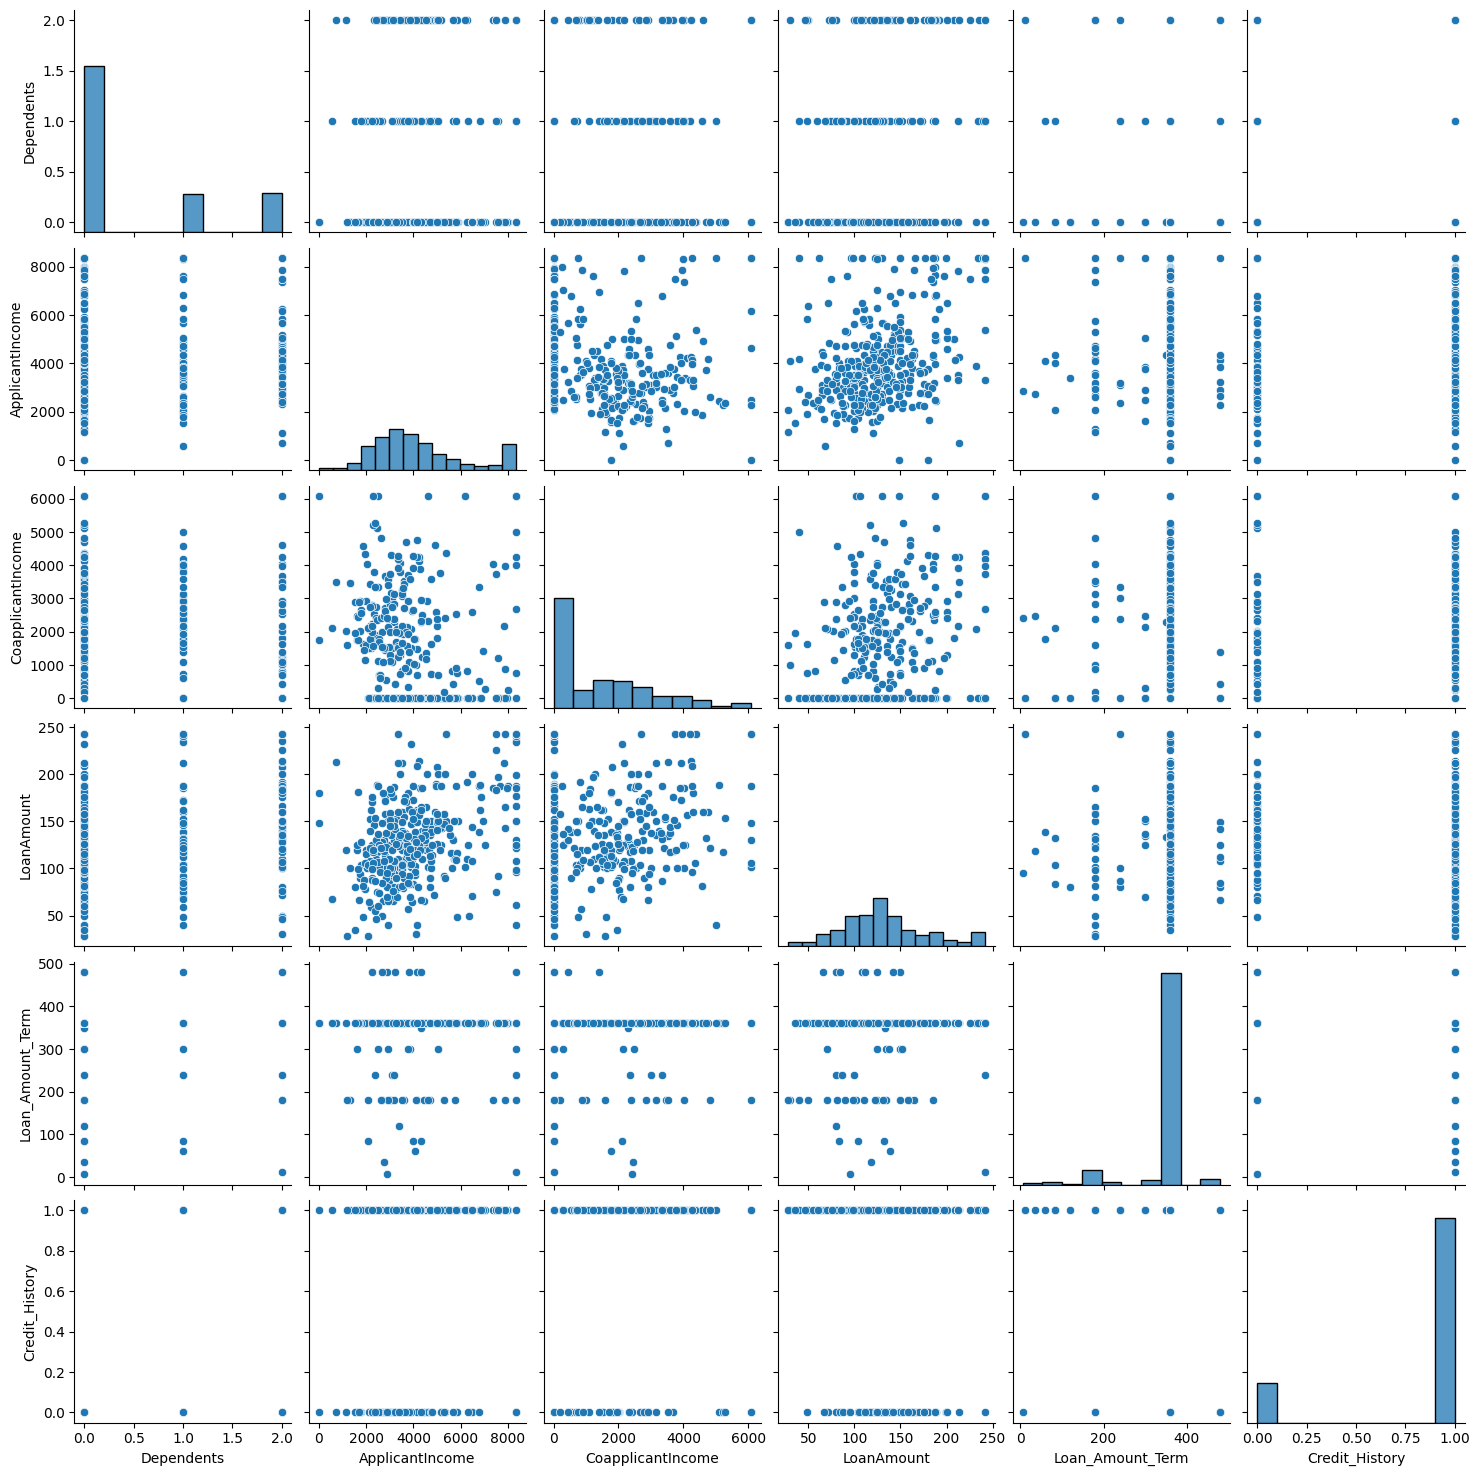

In [88]:
sns.pairplot(df)

### VIOLIN PLOTS

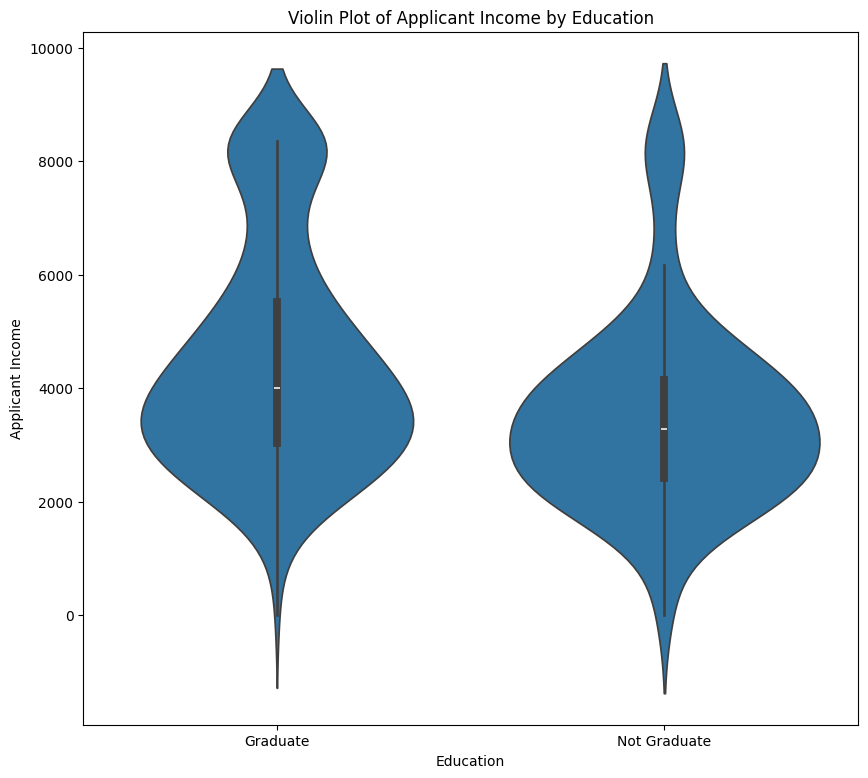

In [89]:
plt.figure(figsize=(10,9))
sns.violinplot(x=df.Education, y=df.ApplicantIncome)
plt.title('Violin Plot of Applicant Income by Education')
plt.xlabel('Education')
plt.ylabel('Applicant Income')
plt.show()

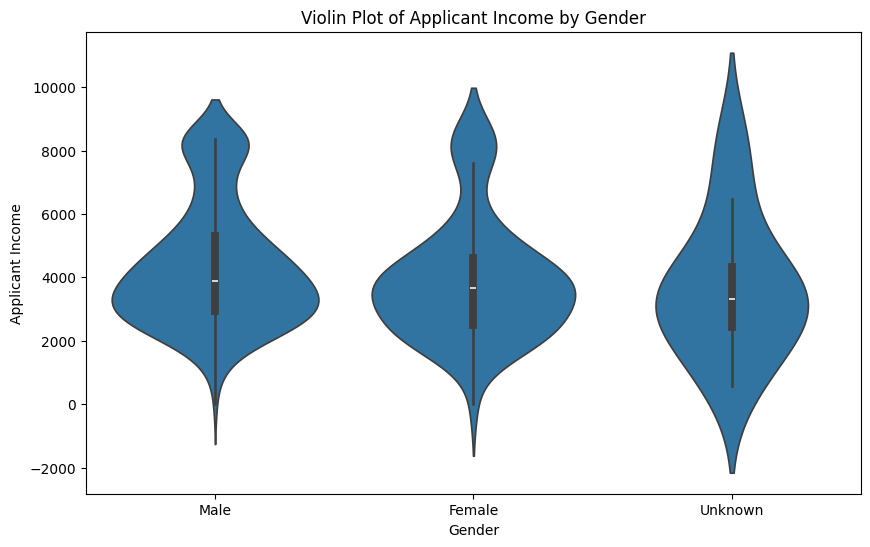

In [90]:
plt.figure(figsize=(10,6))
sns.violinplot(x=df.Gender, y=df.ApplicantIncome)
plt.title('Violin Plot of Applicant Income by Gender')
plt.xlabel('Gender')
plt.ylabel('Applicant Income')
plt.show()

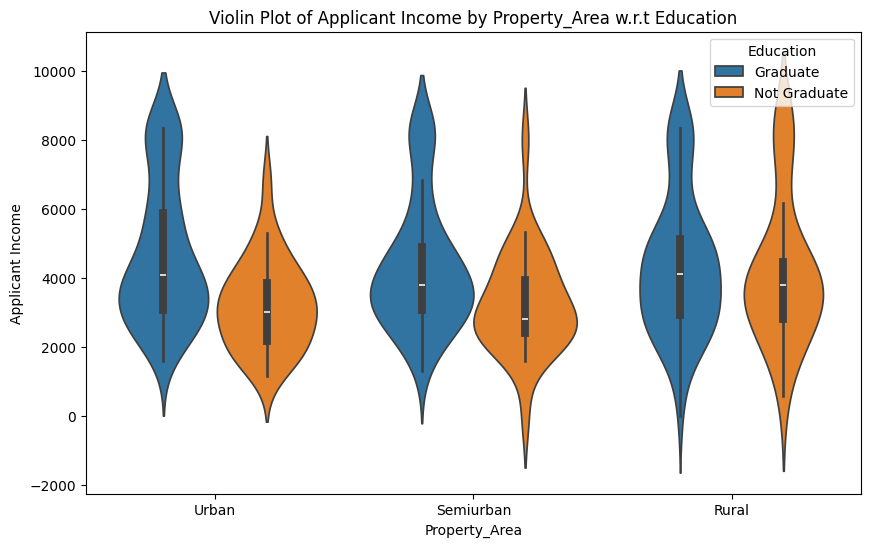

In [91]:
plt.figure(figsize=(10,6))
sns.violinplot(x=df.Property_Area, y=df.ApplicantIncome,hue=df.Education)
plt.title('Violin Plot of Applicant Income by Property_Area w.r.t Education')
plt.xlabel('Property_Area')
plt.ylabel('Applicant Income')
plt.show()

Text(0.5, 1.0, 'Violin Plot of Loan Amount by Gender With respect to Married')

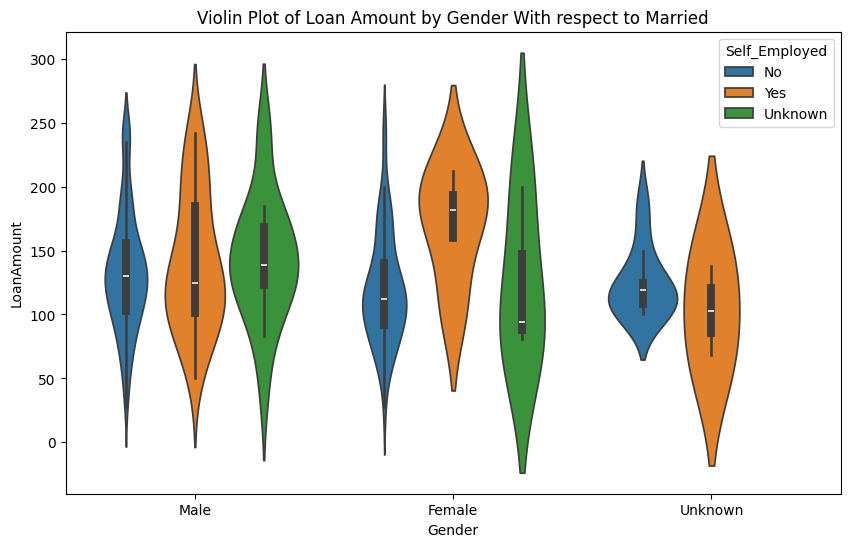

In [92]:
plt.figure(figsize=(10,6))
sns.violinplot(x=df.Gender, y=df.LoanAmount,hue=df.Self_Employed)
plt.title('Violin Plot of Loan Amount by Gender With respect to Married')

# Multivariate Analysis

### Heat Map Using Correlation 

In [93]:
df.corr(numeric_only=True)

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
Dependents,1.000000,0.075689,0.068102,0.128542,0.000624,0.002889
ApplicantIncome,0.075689,1.000000,-0.253653,0.458722,0.022508,0.143344
CoapplicantIncome,0.068102,-0.253653,1.000000,0.194046,-0.027435,-0.039303
LoanAmount,0.128542,0.458722,0.194046,1.000000,0.106143,-0.045232
Loan_Amount_Term,0.000624,0.022508,-0.027435,0.106143,1.000000,-0.048189
Credit_History,0.002889,0.143344,-0.039303,-0.045232,-0.048189,1.000000


<Axes: >

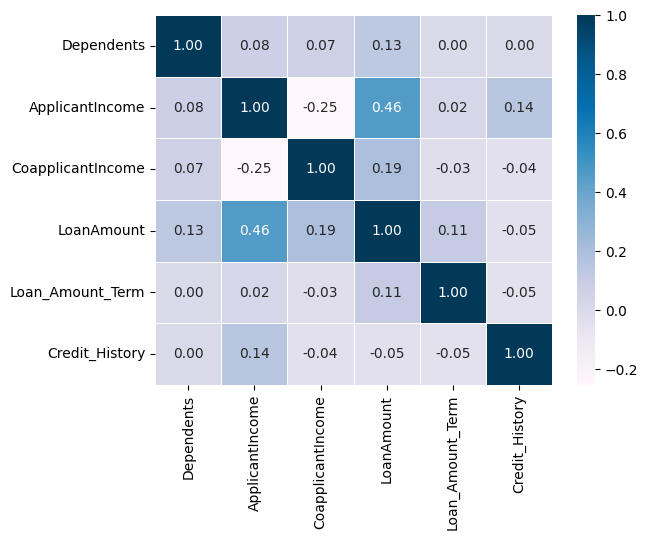

In [94]:
sns.heatmap(df.corr(numeric_only=True),annot=True,fmt= '.2f',cmap='PuBu',linewidth=.5)

## Correlation Matrix Insights

### Relationships between Variables
- **Dependents and ApplicantIncome:** Weak positive correlation (0.076).
- **ApplicantIncome and CoapplicantIncome:** Weak negative correlation (-0.254).
- **LoanAmount and ApplicantIncome:** Moderate positive correlation (0.486).
- **LoanAmount and CoapplicantIncome:** Weak positive correlation (0.171).
- **LoanAmount and Loan_Amount_Term:** Weak positive correlation (0.092).
- **Credit_History and ApplicantIncome:** Weak positive correlation 43).
3).
